In [5]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  

In [6]:
Data = pd.concat([X,y], axis= 1)

Modificando los valores nulos

In [10]:
Data.fillna("?", inplace= True)

Modificando income

In [7]:
#Modificar los datos de los ingresos
Data['income'] = Data['income'].replace({'<=50K': False, '<=50K.': False, '>50K': True, '>50K.': True})

C:\Users\Asus\AppData\Local\Temp\ipykernel_25888\3583862789.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data['income'] = Data['income'].replace({'<=50K': False, '<=50K.': False, '>50K': True, '>50K.': True})


Visualización Inicial de los Datos

In [11]:
def describir_dataframe(df):
    """
    Función para describir detalladamente un DataFrame.

    Args:
        df (pandas.DataFrame): El DataFrame a describir.

    Returns:
        None
    """

    print("Resumen general del DataFrame:")
    print(df.info())

    print("\nEstadísticas descriptivas de las columnas numéricas:")
    print(df.describe())

    print("\nValores únicos y conteo por columna:")
    for col in df.columns:
        print(f"\nColumna: {col}")
        print(f"Valores únicos: {df[col].nunique()}")
        print(f"Tipos de datos: {df[col].dtype}")
        if df[col].dtype == 'object':
            print(f"Valores únicos (categorías):\n{df[col].value_counts(dropna=False)}")
        elif df[col].dtype in ['int64', 'float64']:
            print(f"Valores nulos: {df[col].isnull().sum()}")
            print(f"Valores mínimos: {df[col].min()}")
            print(f"Valores máximos: {df[col].max()}")
            print(f"Media: {df[col].mean()}")
            print(f"Mediana: {df[col].median()}")
            print(f"Desviación estándar: {df[col].std()}")
    for col in df.select_dtypes(include=['number']):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        print(f"Valores atípicos en {col}: {outliers.shape[0]}")
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            # Si la variable es numérica, crea un histograma
            plt.figure(figsize=(8, 4))
            sns.histplot(data=df, x=col, kde=True)
            plt.title(f"Distribución de {col}")
            plt.show()
        else:
            # Si la variable es categórica, crea un gráfico de conteo
            plt.figure(figsize=(8, 4))
            sns.countplot(data=df, x=col)
            plt.title(f"Conteo de valores en {col}")
            plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
            plt.show()

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  bool  
dtypes: bool(1), int64(6), object(8)
memory usage: 5.3+ MB


Resumen general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  bool  
dtypes: bool(1), int64(6), object(8)
memory usage: 5.3+ MB
None

Estadísticas descriptivas de las columnas numér

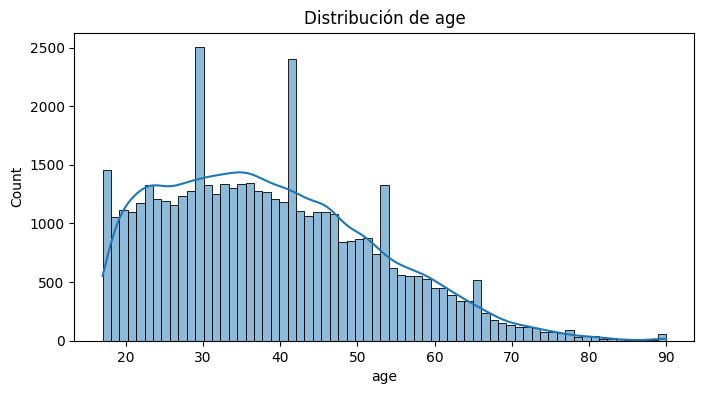

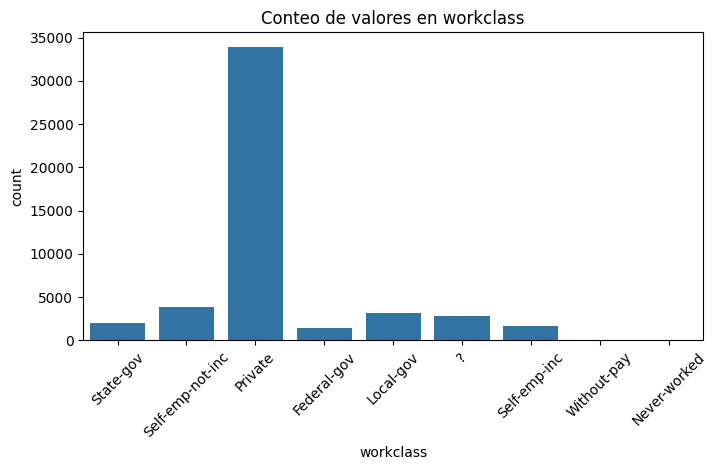

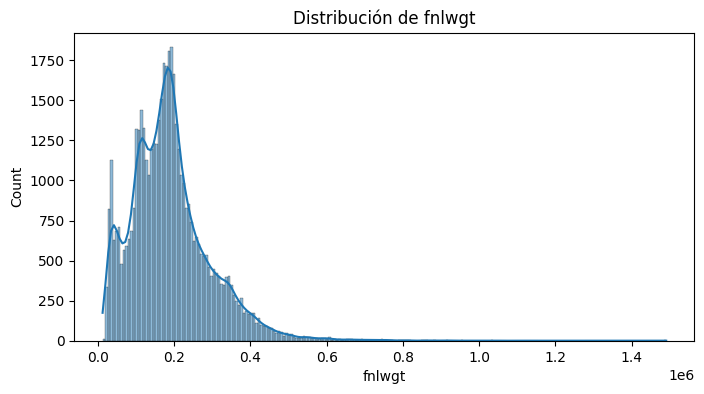

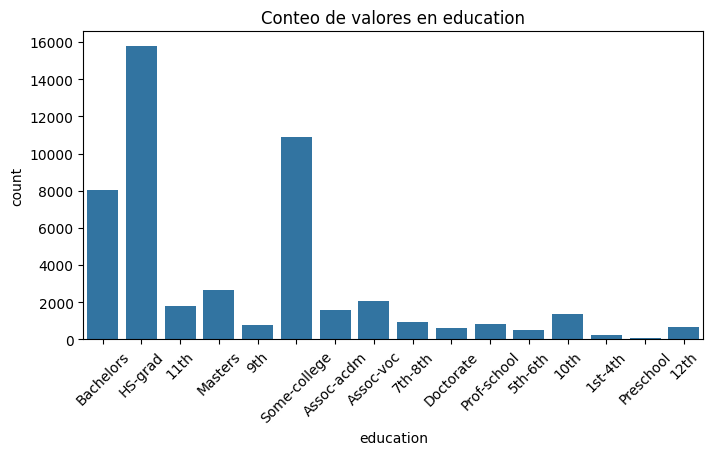

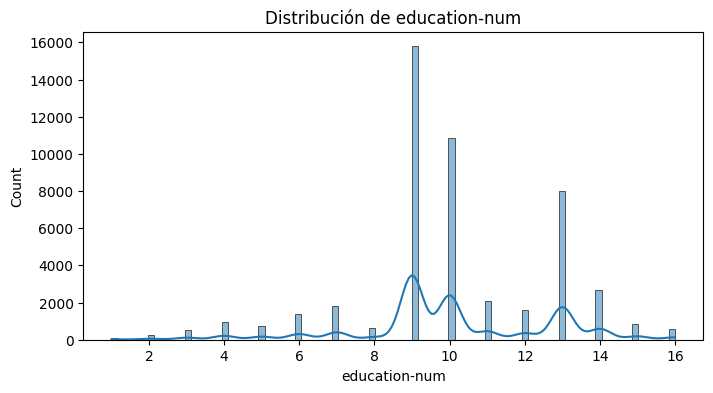

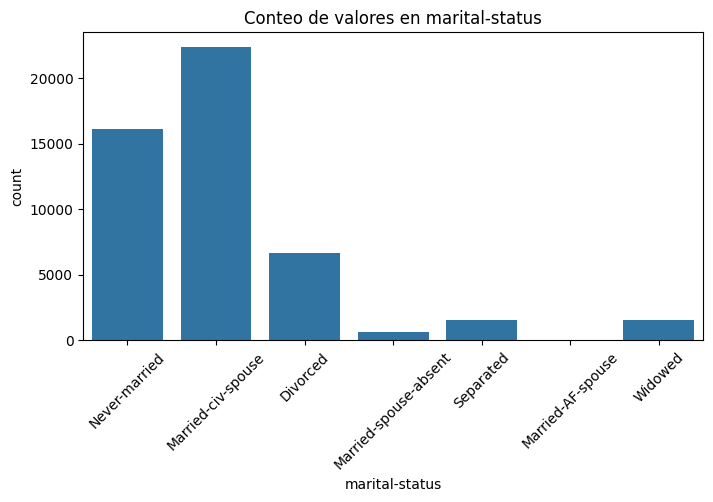

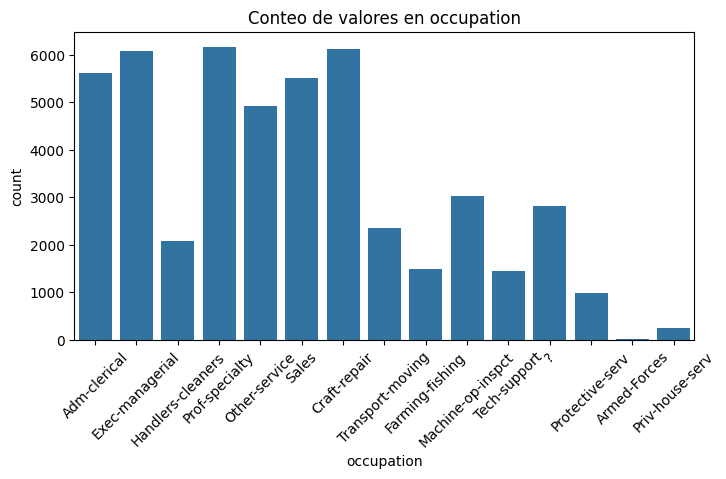

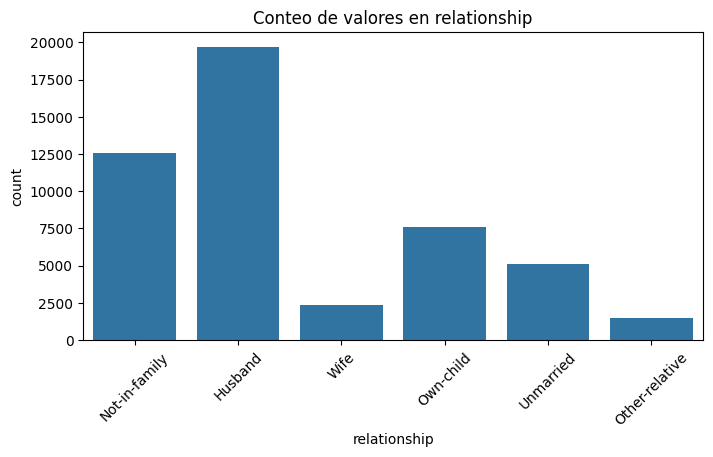

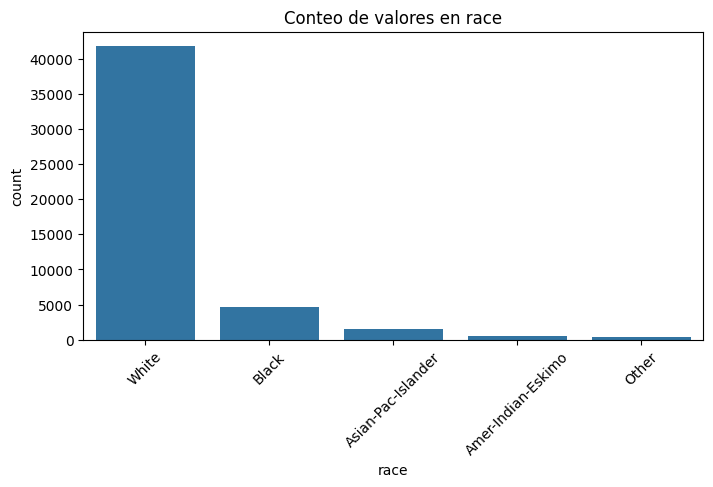

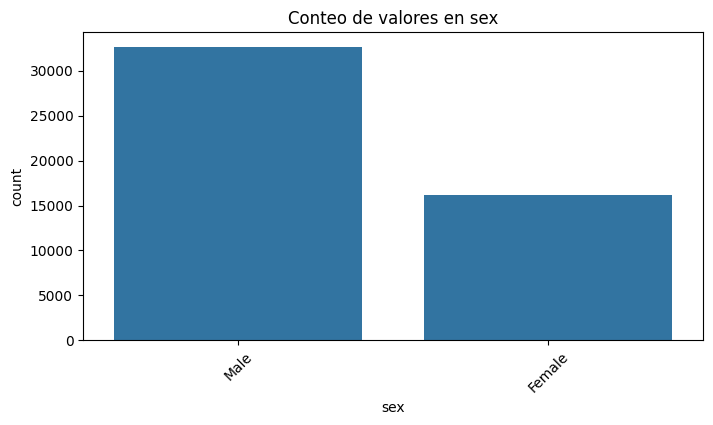

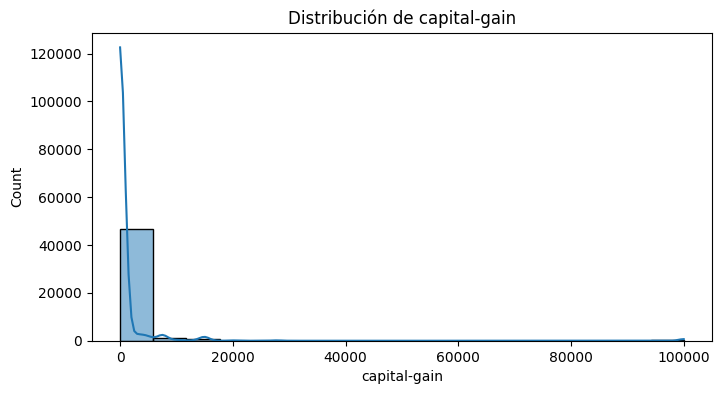

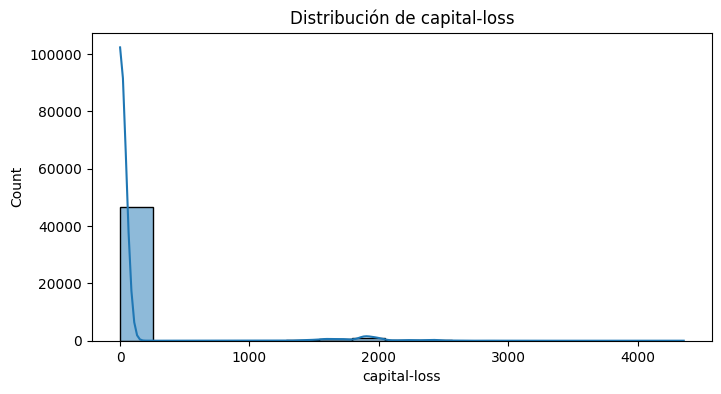

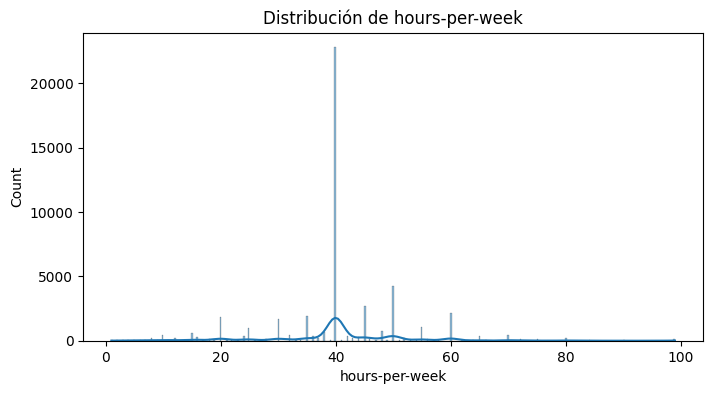

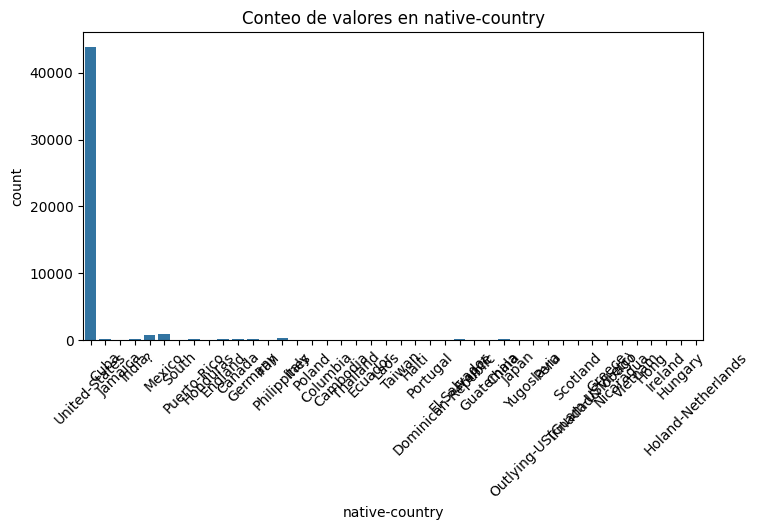

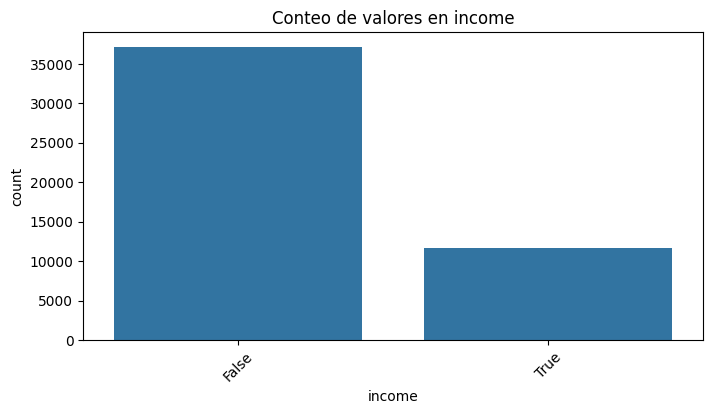

In [13]:
describir_dataframe(Data)

Exportar el CSV

In [15]:
Data.to_csv('../Data/data_adults.csv', index= False)